### Calculating the SST climatology for each month and visualising the anomalies during 2013 ###

In [2]:
import xarray as xr
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.mpl.ticker as cticker

In [3]:
d1 = xr.open_dataset('/home/jovyan/ohw23_proj_SAupwelling/Datasets/sst_era5_swa.nc')
#coversting to degree c
d1 = d1- 273.15
d1

<xarray.Dataset>
Dimensions:    (longitude: 161, latitude: 141, time: 372)
Coordinates:
  * longitude  (longitude) float32 110.0 110.2 110.5 110.8 ... 149.5 149.8 150.0
  * latitude   (latitude) float32 -25.0 -25.25 -25.5 ... -59.5 -59.75 -60.0
  * time       (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2020-12-01
Data variables:
    sst        (time, latitude, longitude) float32 22.96 23.06 ... -0.2276
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-10 07:42:18 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [4]:
sst_clim = d1.groupby('time.month').mean('time') 
#sst_clim
sst_anom = d1.groupby('time.month') - sst_clim 
sst_anom
#slicing
d2 = sst_anom.sel(latitude = slice(-30,-40), longitude = slice(130,146))
d3 = sst_clim.sel(latitude = slice(-30,-40), longitude = slice(130,146))



In [5]:
d2 = d2.drop_vars('month')
d2

<xarray.Dataset>
Dimensions:    (longitude: 65, latitude: 41, time: 372)
Coordinates:
  * longitude  (longitude) float32 130.0 130.2 130.5 130.8 ... 145.5 145.8 146.0
  * latitude   (latitude) float32 -30.0 -30.25 -30.5 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2020-12-01
Data variables:
    sst        (time, latitude, longitude) float32 nan nan ... -0.1663 -0.1597

In [6]:
clim_list = []  # Create an empty list to store the clim variables

for month in range(12):
    clim = d3['sst'].isel(month=month)  # Create the clim variable for each month
    clim_list.append(clim)

In [7]:
timesteps = ['2013-01-01','2013-02-01','2013-03-01','2013-04-01','2013-05-01','2013-06-01',
            '2013-07-01','2013-08-01','2013-09-01','2013-10-01','2013-11-01','2013-12-01']
anom_list = []  # Create an empty list to store the anom variables for 2013

for i in timesteps:
    anom = d2['sst'].sel(time=i)  # Create the anom variable for each month in 2013
    anom_list.append(anom)

In [8]:
#same for 2014, But plot not shown. To see the plot unhash the last cell
timesteps_2014 = ['2014-01-01','2014-02-01','2014-03-01','2014-04-01','2014-05-01','2014-06-01',
            '2014-07-01','2014-08-01','2014-09-01','2014-10-01','2014-11-01','2014-12-01']
anom_list_14 = []  # Create an empty list to store the clim variables

for i in timesteps:
    anom_14 = d2['sst'].sel(time=i)  # Create the clim variable for each month
    anom_list_14.append(anom_14)

In [9]:
lon = d3['longitude']
lat = d3['latitude']

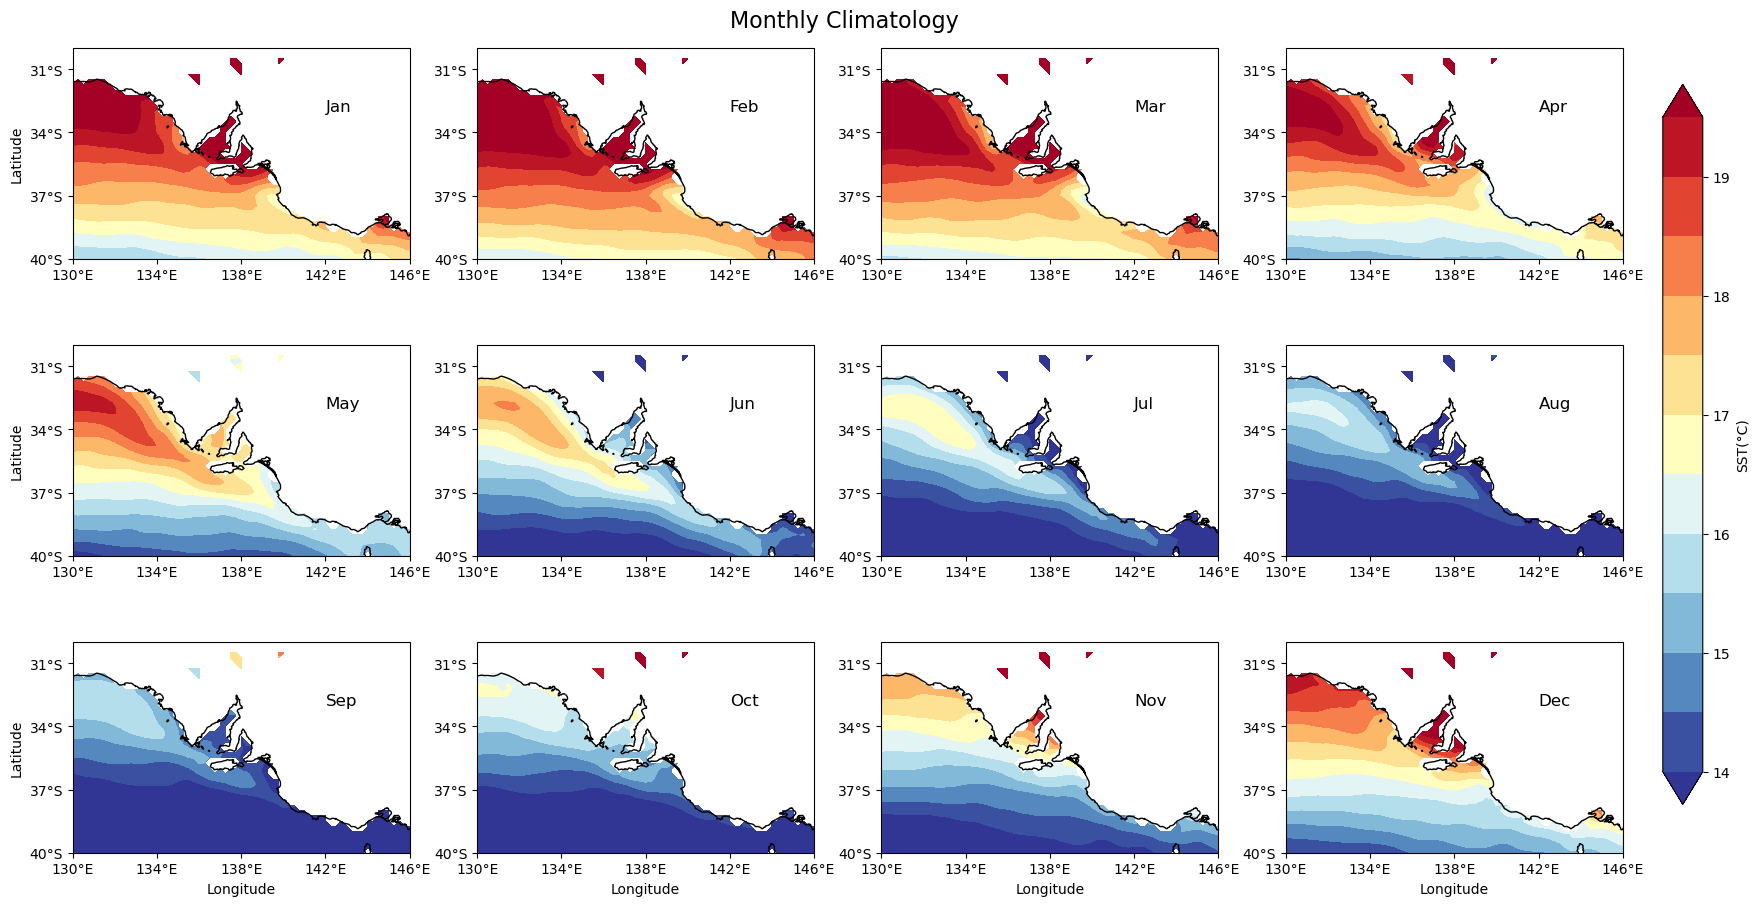

In [10]:
#plotting monthly climatology of SST
fig, axs = plt.subplots(3, 4, figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(hspace=-0.1,wspace=0.2)

lev=np.arange(14,20,0.5)
text=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
d=0
for i in range (3):
    for j in range (4):
            pl= axs[i,j].contourf(lon,lat,clim_list[d],cmap='RdYlBu_r', levels=lev, extend='both')
            axs[i,j].text(142,-33,text[d],fontsize=12)
            d=d+1
            
for i in range(3):
    for j in range(4):
            axs[i,j].coastlines()
            # Define the xticks for longitude
            axs[i,j].set_xticks(np.arange(130,147,4), crs=ccrs.PlateCarree())
            lon_formatter = cticker.LongitudeFormatter()
            axs[i,j].xaxis.set_major_formatter(lon_formatter)
            # Define the yticks for latitude
            axs[i,j].set_yticks(np.arange(-40,-30,3), crs=ccrs.PlateCarree())
            lat_formatter = cticker.LatitudeFormatter()
            axs[i,j].yaxis.set_major_formatter(lat_formatter)
            axs[2,j].set_xlabel('Longitude')
            axs[i,0].set_ylabel('Latitude')
            

axs[0,1].text(142,-29,'Monthly Climatology',fontsize=16)
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Adjust the position and size of the colorbar
cbar = fig.colorbar(pl, cax=cbar_ax)
cbar.set_label('SST(°C)')
fig.savefig('/home/jovyan/ohw23_proj_SAupwelling/Figures/sst_monthly_climatology.jpeg', bbox_inches='tight', transparent=True, dpi=600)

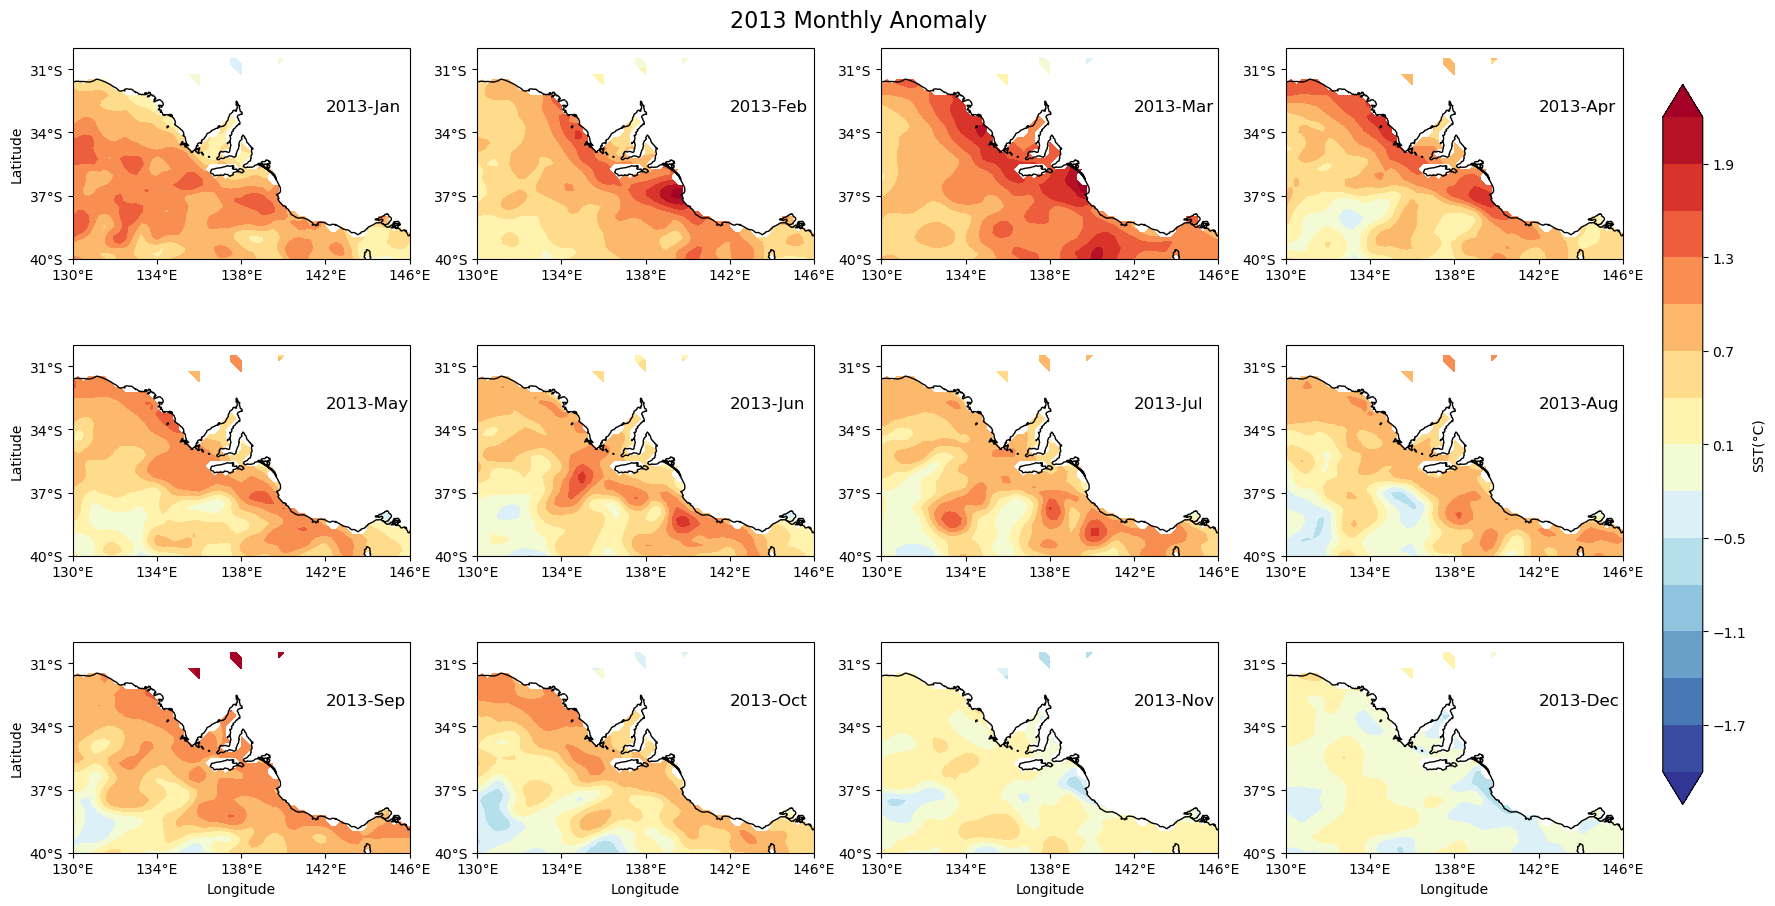

In [11]:
#plotting monthly anomaly of SST for 2013
fig, axs = plt.subplots(3, 4, figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(hspace=-0.1,wspace=0.2)

lev=np.arange(-2,2.3,0.3)
text=['2013-Jan','2013-Feb','2013-Mar','2013-Apr','2013-May','2013-Jun','2013-Jul','2013-Aug',
      '2013-Sep','2013-Oct','2013-Nov','2013-Dec']
d=0
for i in range (3):
    for j in range (4):
            pl= axs[i,j].contourf(lon,lat,anom_list[d],cmap='RdYlBu_r', levels=lev,extend='both')
            axs[i,j].text(142,-33,text[d],fontsize=12)
            d=d+1
            
for i in range(3):
    for j in range(4):
            axs[i,j].coastlines()
            # Define the xticks for longitude
            axs[i,j].set_xticks(np.arange(130,147,4), crs=ccrs.PlateCarree())
            lon_formatter = cticker.LongitudeFormatter()
            axs[i,j].xaxis.set_major_formatter(lon_formatter)
            # Define the yticks for latitude
            axs[i,j].set_yticks(np.arange(-40,-30,3), crs=ccrs.PlateCarree())
            lat_formatter = cticker.LatitudeFormatter()
            axs[i,j].yaxis.set_major_formatter(lat_formatter)
            axs[2,j].set_xlabel('Longitude')
            axs[i,0].set_ylabel('Latitude')
            
axs[0,1].text(142,-29,'2013 Monthly Anomaly',fontsize=16)         
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Adjust the position and size of the colorbar
cbar = fig.colorbar(pl, cax=cbar_ax)
cbar.set_label('SST(°C)')

fig.savefig('/home/jovyan/ohw23_proj_SAupwelling/Figures/2013_sst_monthly_ANOMALY.jpeg', bbox_inches='tight', transparent=True, dpi=600)

In [100]:
##Same as above, but for 2014
# fig, axs = plt.subplots(3, 4, figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})
# fig.subplots_adjust(hspace=-0.1,wspace=0.2)

# lev=np.arange(-2,2.3,0.3)
# text=['2014-Jan','2014-Feb','2014-Mar','2014-Apr','2014-May','2014-Jun','2014-Jul','2014-Aug',
#       '2014-Sep','2014-Oct','2014-Nov','2014-Dec']
# d=0
# for i in range (3):
#     for j in range (4):
#             pl= axs[i,j].contourf(lon,lat,anom_list_14[d],cmap='jet', levels=lev,extend='both')
#             axs[i,j].text(142,-33,text[d],fontsize=12)
#             d=d+1
            
# for i in range(3):
#     for j in range(4):
#             axs[i,j].coastlines()
#             # Define the xticks for longitude
#             axs[i,j].set_xticks(np.arange(130,147,4), crs=ccrs.PlateCarree())
#             lon_formatter = cticker.LongitudeFormatter()
#             axs[i,j].xaxis.set_major_formatter(lon_formatter)
#             # Define the yticks for latitude
#             axs[i,j].set_yticks(np.arange(-40,-30,3), crs=ccrs.PlateCarree())
#             lat_formatter = cticker.LatitudeFormatter()
#             axs[i,j].yaxis.set_major_formatter(lat_formatter)
#             axs[2,j].set_xlabel('Longitude')
#             axs[i,0].set_ylabel('Latitude')
            
            
# cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Adjust the position and size of the colorbar
# cbar = fig.colorbar(pl, cax=cbar_ax)
# cbar.set_label('SST(°C)')
